# 📌 Week 3 시계열 데이터 과제

- **구성:** 이론 + 실습  
- **이론:** 정규 세션 핵심 내용 기반 주관식 문제(총 2문제)
- **실습:** ARIMA 모델 & DLinear 모델 활용(총 4문제)
<br><br> 모르는 부분 혹은 문제에 오류가 있는 경우 편하게 연락해주세요:)

## 📖 이론
🔹 정규 세션에서 배운 핵심 개념을 바탕으로 한 **주관식 문제**입니다.  

**Q1**


- 시계열 데이터에서 정상성이 중요한 이유를 말씀해주시고, ARIMA 모델에서는 데이터의 비정상성을 어떻게 처리하는지 설명해주세요.

**A1**

1. 정상성이 중요한 이유
: 정상 시계열(Stationary Time Series)은 평균, 분산, 자기공분산이 시간에 따라 변하지 않는 시계열을 의미한다. 많은 시계열 모델, 특히 AR, MA, ARMA, ARIMA 등은 과거 시점의 패턴이 미래 시점에 일정하게 적용된다는 가정을 기반으로 한다. 비정상 시계열에서는 평균이나 분산이 시간에 따라 변화하기 때문에 모델이 학습한 패턴이 예측에 적합하지 않을 수 있다. 따라서 정상성이 예측 정확도를 높이기 위해 필수적이다.

2. ARIMA에서 비정상성 처리 방법
: ARIMA 모델은 '차분(differencing)'을 통해 비정상 시계열을 정상 시계열로 변환한다. 예를 들어, 1차 차분은 현재 값에서 이전 값을 빼는 방식이며, 필요에 따라 '차분의 차수(d)'를 조정하여 시계열을 안정화시킨다. 이렇게 차분된 데이터를 대상으로 AR(p)와 MA(q) 모델링을 수행한다.

**Q2**

- AR(p) 및 MA(q) 모델을 차이점을 중심으로 설명해주세요. 또한, 파라미터 p와 q 결정하는 방법에 대해 상세하게 설명해주세요.

**A2**

1. AR(p)와 MA(q) 모델 정의

(1) AR(p) 모델(자기회귀 모델)
: AR(p) 모델은 현재 시점의 값이 과거 p개의 값에 의해 설명되는 모델이다. 즉, 과거 데이터 자체가 현재 값을 예측하는 데 사용된다. 시계열이 일정한 패턴이나 추세를 보일 때 적합하다.

(2) MA(q) 모델(이동평균 모델)
: MA(q) 모델은 현재 시점의 값이 과거 q개의 오차나 충격에 의해 설명되는 모델이다. 즉, 과거 예측과 실제 값의 차이(오차)가 현재 값을 결정하는 데 영향을 준다. 시계열에서 갑작스러운 변화나 불규칙한 노이즈를 잘 설명할 수 있다.

2. AR과 MA 모델의 핵심 차이점

: AR 모델은 과거 값을 기반으로 예측하고, MA 모델은 과거 오차를 기반으로 예측한다. AR 모델은 시계열의 패턴이나 지속성을 포착하는 데 강하고, MA 모델은 단기적 충격이나 불규칙성을 포착하는 데 강하다. AR 모델을 선택할 때는 과거 값과 현재 값의 관계를 보여주는 부분자기상관함수를 주로 보고, MA 모델을 선택할 때는 자기상관함수를 중심으로 분석한다.

3. 파라미터 p와 q 결정 방법

(1) 시각적 방법
: AR 모델의 p 값은 부분자기상관함수에서 급격히 떨어지는 지점에서 결정한다. MA 모델의 q 값은 자기상관함수에서 급격히 떨어지는 지점에서 결정한다. 시계열을 그래프로 그려보고, ACF와 PACF를 관찰하면 어느 정도 초기 추정치를 잡을 수 있다.

(2) 정보 기준 활용
: AIC나 BIC와 같은 정보 기준을 사용하여 최적의 p와 q를 선택할 수 있다. 여러 후보 모델을 적합시켜 보고, AIC 또는 BIC 값이 가장 낮은 조합을 선택하면 된다.

(3) 단계별 전략
: 시계열이 안정적인지 확인하고 필요하면 차분으로 정상성을 확보한다. ACF와 PACF를 보고 초기 추정치를 정한다. 모델을 적합시키고 잔차가 백색잡음인지 확인한다. 최종적으로 AIC나 BIC를 기준으로 p와 q를 결정한다.



---



## 💻 실습1 ARIMA  
🔹 모의 데이터를 활용한 **ARIMA** 모델 실습입니다. 주어진 데이터를 활용하여 코드 중간중간 주어진 문제에 답해주세요.


### 데이터 전처리

In [14]:
from google.colab import drive
import pandas as pd

drive.mount('/content/drive')

# 데이터 로드
df = pd.read_csv("/content/drive/MyDrive/Time_Series_hw_data_train.csv")
df_eval = pd.read_csv("/content/drive/MyDrive/Time_Series_hw_data_test.csv")

# 데이터 확인
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [15]:
df["date"] = pd.to_datetime(df["date"])
df.set_index("date", inplace=True)

# 필요한 컬럼 선택 (meantemp)
df = df[["meantemp"]]

df_eval["date"] = pd.to_datetime(df_eval["date"])
df_eval.set_index("date", inplace=True)

# 필요한 컬럼 선택 (meantemp)
df_eval = df_eval[["meantemp"]]

df.head()

,meantemp
date,
2013-01-01,10.000000
2013-01-02,7.400000
2013-01-03,7.166667
2013-01-04,8.666667
2013-01-05,6.000000


### 정상성 확인

In [16]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

# ADF 테스트 (단위근 검정) 수행
adf_result = adfuller(df["meantemp"])
adf_statistic, p_value = adf_result[0], adf_result[1]


# ADF 검정 결과 출력
adf_statistic, p_value

(-2.0210690559206737, 0.2774121372301601)

**Q1**

- 위 결과로부터 데이터가 정상성을 가지는지 답하고, 비정상성을 가진다면 어떤 처리를 할 수 있는지 서술해주세요,<br><br>




**A1**<br><br>
답: 주어진 ADF 검정 결과를 보면, 검정 통계량은 -2.021, p-value는 0.277로 나타났다. ADF 검정에서 귀무가설은 “시계열이 비정상성을 가진다”이고, 대립가설은 “시계열이 정상성을 가진다”이다. 일반적으로 유의수준 0.05를 기준으로 p-value를 비교한다.

이번 결과에서 p-value가 0.05보다 크므로 귀무가설을 기각할 수 없다. 따라서 현재 meantemp 시계열 데이터는 정상성을 가지지 않고 비정상성을 가진다고 판단할 수 있다.

비정상성을 가진 시계열은 AR, MA, ARMA, ARIMA 등의 시계열 모델링 전에 반드시 정상성을 확보해야 한다. 정상성을 확보하는 대표적인 방법은

1. 차분(Differencing): 현재 값에서 이전 값을 빼서 시계열을 평탄하게 만드는 방법이다. 일반적으로 1차 차분을 적용하며, 필요시 2차 차분을 수행할 수도 있다.

2. 로그 변환(Log Transformation): 시계열 데이터가 급격히 증가하거나 분산이 커지는 경우, 로그를 취해 안정화할 수 있다.

3. 계절성 제거(Seasonal Differencing): 시계열에 계절 패턴이 있는 경우, 계절 주기 단위로 차분하여 정상성을 확보할 수 있다.

4. 이동평균(Moving Average) 등 평활화: 단기적인 변동을 줄여 시계열을 안정화하는 방법으로, 주로 잡음 제거나 시각화 목적에 사용된다.

결론적으로, 이번 데이터는 정상성을 가지지 않으므로, 모델링 전에 차분이나 로그 변환 등의 정상화 과정을 거쳐야 한다고 할 수 있다.

In [17]:
# 차분 진행
df_diff = df.diff().dropna()

# ADF 테스트 (차분 후)
adf_result_diff = adfuller(df_diff["meantemp"])
adf_statistic_diff, p_value_diff = adf_result_diff[0], adf_result_diff[1]

adf_statistic_diff, p_value_diff

(-16.378720267074673, 2.764863137594644e-29)

### ARIMA 하이퍼 파라미터 결정

**Q2**

- 아래 ACF와 PACF Plot으로부터 ARIMA의 하이퍼파라미터인 p와 q를 얼마로 설정해야할지 그 숫자와 근거를 적어주세요. 이후 변수를 선언해주세요.<br><br>

**A2**<br>

p: 1   

이유: PACF(부분자기상관함수) 플롯에서 1번째 시점에서 유의미하게 컷오프되고 이후 값이 0 근처로 떨어지므로, 자기회귀 차수는 1로 설정하는 것이 적절하다.  

q: 1

이유: ACF(자기상관함수) 플롯에서 1번째 시점에서 유의미하게 컷오프되고 이후 값이 거의 0으로 수렴하므로, 이동평균 차수는 1로 설정하는 것이 적절하다.

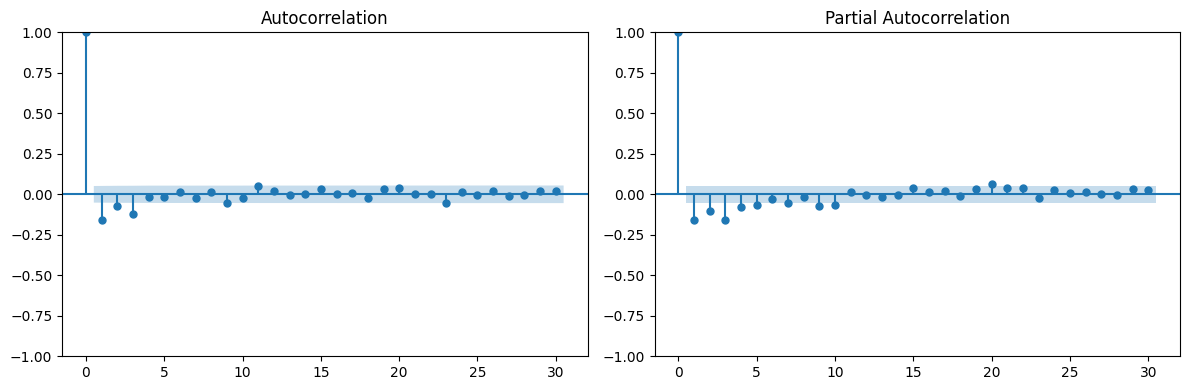

In [18]:
# ACF와 PACF 플롯
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sm.graphics.tsa.plot_acf(df_diff["meantemp"], lags=30, ax=axes[0])
sm.graphics.tsa.plot_pacf(df_diff["meantemp"], lags=30, ax=axes[1])

plt.tight_layout()
plt.show()


In [19]:
# 변수 선언

p= 1
q= 1

### ARIMA 학습

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


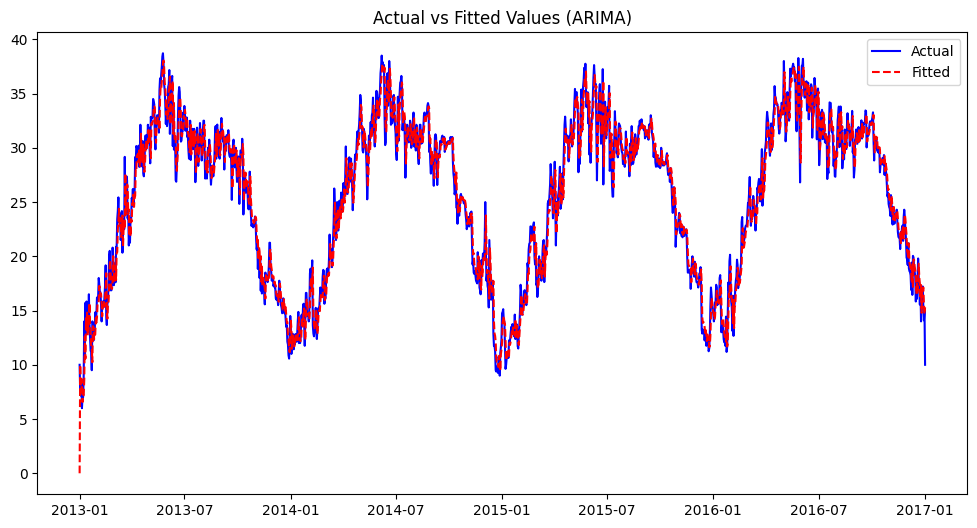

In [20]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(df["meantemp"], order=(p, 1, q))
model_fit = model.fit()

# 예측 수행
df["fitted"] = model_fit.fittedvalues

# 실제값과 예측값 시각화
plt.figure(figsize=(12, 6))
plt.plot(df["meantemp"], label="Actual", color="blue")
plt.plot(df["fitted"], label="Fitted", color="red", linestyle="dashed")
plt.title("Actual vs Fitted Values (ARIMA)")
plt.legend()
plt.show()

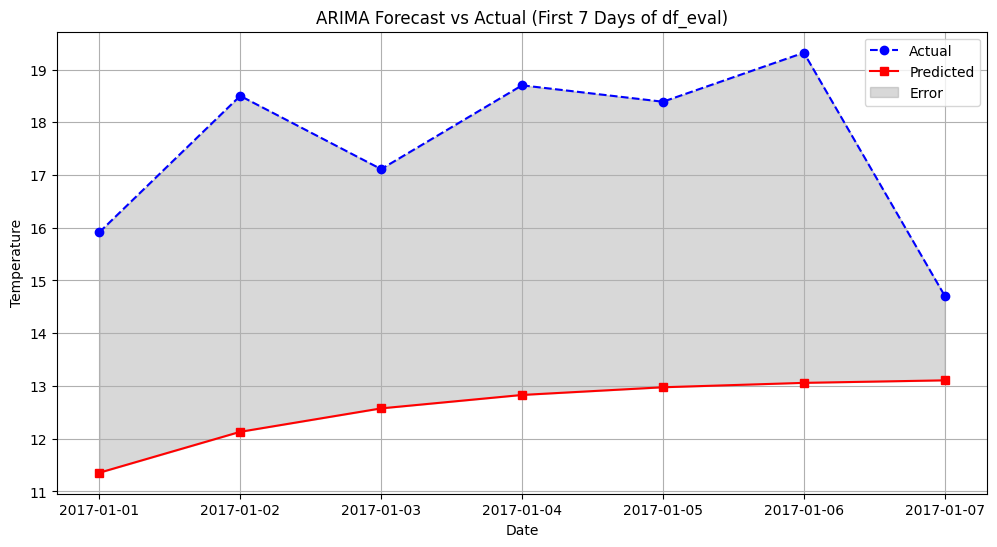

In [21]:
test_series = df_eval['meantemp'][:7]

forecast_steps = 7
forecast = model_fit.forecast(steps=forecast_steps)

plt.figure(figsize=(12, 6))
plt.plot(test_series.index, test_series, label="Actual", linestyle="dashed", marker="o", color="blue")
plt.plot(test_series.index, forecast, label="Predicted", marker="s", color="red")
plt.fill_between(test_series.index, test_series, forecast, color="gray", alpha=0.3, label="Error")
plt.title("ARIMA Forecast vs Actual (First 7 Days of df_eval)")
plt.xlabel("Date")
plt.ylabel("Temperature")
plt.legend()
plt.grid()
plt.show()

### AutoARIMA

아래는 자동으로 p,d,q 값을 계산해주는 auto_arima를 사용한 코드입니다.

In [22]:
!pip install --upgrade --force-reinstall numpy==1.26.4 pmdarima statsmodels

  Using cached numpy-1.26.4-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
  Using cached pmdarima-2.0.4-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_28_x86_64.whl.metadata (7.8 kB)
  Using cached statsmodels-0.14.5-cp312-cp312-manylinux2014_x86_64.manylinux_2_17_x86_64.manylinux_2_28_x86_64.whl.metadata (9.5 kB)
  Using cached joblib-1.5.1-py3-none-any.whl.metadata (5.6 kB)
  Using cached cython-3.1.3-cp312-cp312-manylinux2014_x86_64.manylinux_2_17_x86_64.manylinux_2_28_x86_64.whl.metadata (4.7 kB)
  Using cached pandas-2.3.2-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (91 kB)
  Using cached scikit_learn-1.7.1-cp312-cp312-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (11 kB)
  Using cached scipy-1.16.1-cp312-cp312-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (61 kB)
  Using cached urllib3-2.5.0-py3-none-any.whl.metadata (6.5 kB)
  Using cached setuptools-80.9.0-py3-none-any.whl.metadata (6.

In [23]:
from pmdarima import auto_arima

stepwise_model = auto_arima(df["meantemp"],
                            start_p=0, max_p=5,
                            start_q=0, max_q=5,
                            seasonal=False,
                            trace=True,  # 최적화 과정 출력
                            error_action="ignore",
                            suppress_warnings=True)

# 최적의 (p, d, q) 값 출력
print(f"\n Optimal (p, d, q): {stepwise_model.order}\n")

# 최적의 파라미터로 ARIMA 모델 학습
p, d, q = stepwise_model.order
model = ARIMA(df["meantemp"], order=(p, d, q))
model_fit = model.fit()

# 예측값 저장
df["fitted"] = model_fit.fittedvalues


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=5650.181, Time=0.14 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=5614.068, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=5602.114, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=5648.181, Time=0.03 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=5544.460, Time=0.85 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=5546.100, Time=0.41 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=5546.168, Time=0.51 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=5573.723, Time=0.17 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=5600.849, Time=0.34 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=5546.314, Time=4.86 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(0,0,0)[0]             : AIC=5542.478, Time=0.34 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,0)[0]             : AIC=5600.115, Time=0.26 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=5612.068, Time=0.11 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(0,0,0)[0]             : AIC=5544.118, Time=0.96 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(0,0,0)[0]             : AIC=5544.186, Time=0.22 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,2)(0,0,0)[0]             : AIC=5571.729, Time=0.41 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(0,0,0)[0]             : AIC=5598.850, Time=0.25 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(0,0,0)[0]             : AIC=5544.332, Time=1.22 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0]          
Total fit time: 11.273 seconds

 Optimal (p, d, q): (1, 1, 1)



/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


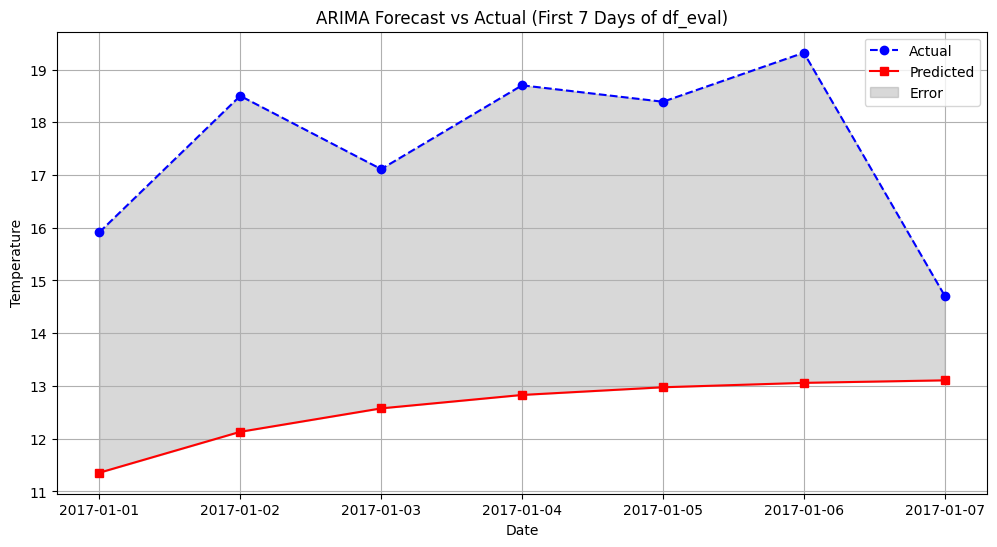

In [24]:
test_series = df_eval['meantemp'][:7]

forecast_steps = 7
forecast = model_fit.forecast(steps=forecast_steps)

plt.figure(figsize=(12, 6))
plt.plot(test_series.index, test_series, label="Actual", linestyle="dashed", marker="o", color="blue")
plt.plot(test_series.index, forecast, label="Predicted", marker="s", color="red")
plt.fill_between(test_series.index, test_series, forecast, color="gray", alpha=0.3, label="Error")
plt.title("ARIMA Forecast vs Actual (First 7 Days of df_eval)")
plt.xlabel("Date")
plt.ylabel("Temperature")
plt.legend()
plt.grid()
plt.show()



---



## 💻 실습2 Dlinear

In [26]:
import pandas as pd
import numpy as np

# 데이터 로드
train_df = pd.read_csv('/content/drive/MyDrive/Time_Series_hw_data_train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/Time_Series_hw_data_test.csv')

# 날짜 컬럼을 제외한 데이터만 사용
train_df['date'] = pd.to_datetime(train_df['date'])
test_df['date'] = pd.to_datetime(test_df['date'])
train_df.set_index('date', inplace=True)
test_df.set_index('date', inplace=True)

features = ['meantemp', 'humidity', 'wind_speed', 'meanpressure']
train_values = train_df[features].values.astype(np.float32)
test_values = test_df[features].values.astype(np.float32)

**Q3**

- 30일간의 날씨 데이터를 이용해 7일 동안의 온도, 습도, 풍속, 대기압을 예측하고자 합니다. 아래 코드의 빈칸을 채워주세요. <br><br>


In [27]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from torch.utils.data import Dataset, DataLoader

# Sliding Window 전처리
def create_sequences(data, seq_len, pred_len):
    X, y = [], []
    for i in range(len(data) - seq_len - pred_len):
        X.append(data[i:i+seq_len]) # 빈칸을 채워주세요
        y.append(data[i+seq_len:i+seq_len+pred_len])  # 빈칸을 채워주세요
    return np.array(X), np.array(y)


seq_len = 30 # 빈칸을 채워주세요(예측을 위해 사용할 time step 수)
pred_len = 7 # 빈칸을 채워주세요(실제 예측할 time step 수)
X_train, y_train = create_sequences(train_values, seq_len, pred_len)


# PyTorch Dataset 정의
class TimeSeriesDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.float32)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)

train_dataset = TimeSeriesDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)

/tmp/ipython-input-2452587905.py:27: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.X = torch.tensor(X, dtype=torch.float32)
/tmp/ipython-input-2452587905.py:28: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.y = torch.tensor(y, dtype=torch.float32)


In [28]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np

# Dlinear 모델 선언

# 이동 평균을 이용한 추세 추출
class moving_avg(nn.Module):

    def __init__(self, kernel_size, stride):
        super(moving_avg, self).__init__()
        self.kernel_size = kernel_size # Kernel: 이동 평균을 계산하기 위한 시간대의 길이
        self.avg = nn.AvgPool1d(kernel_size=kernel_size, stride=stride, padding=0)

    def forward(self, x):
        # padding on the both ends of time series
        front = x[:, 0:1, :].repeat(1, (self.kernel_size - 1) // 2, 1)
        end = x[:, -1:, :].repeat(1, (self.kernel_size - 1) // 2, 1)
        x = torch.cat([front, x, end], dim=1)
        x = self.avg(x.permute(0, 2, 1))
        x = x.permute(0, 2, 1)
        return x

# 시계열 분해
class series_decomp(nn.Module):
    """
    Series decomposition block
    """
    def __init__(self, kernel_size):
        super(series_decomp, self).__init__()
        self.moving_avg = moving_avg(kernel_size, stride=1)

    def forward(self, x):
        moving_mean = self.moving_avg(x)
        res = x - moving_mean # 데이터에서 추세를 빼면 계절성 부분만 남음
        return res, moving_mean

# 모델
class Model(nn.Module):
    def __init__(self, configs):
        super(Model, self).__init__()
        self.seq_len = configs['seq_len']
        self.pred_len = configs['pred_len']
        self.individual = configs['individual'] # 특성마다 다른 선형 회귀를 적용할지 여부
        self.channels = configs['enc_in'] # 입력 및 출력되는 특성 수

        # Decomposition Kernel Size
        kernel_size = configs['kernel_size'] # Kernel: 이동 평균을 계산하기 위한 시간대의 길이
        self.decompsition = series_decomp(kernel_size)

        if self.individual:
            self.Linear_Seasonal = nn.ModuleList()
            self.Linear_Trend = nn.ModuleList()

            for i in range(self.channels):
                self.Linear_Seasonal.append(nn.Linear(self.seq_len, self.pred_len))
                self.Linear_Trend.append(nn.Linear(self.seq_len, self.pred_len))
        else:
            self.Linear_Seasonal = nn.Linear(self.seq_len, self.pred_len)
            self.Linear_Trend = nn.Linear(self.seq_len, self.pred_len)

    def forward(self, x):
        seasonal_init, trend_init = self.decompsition(x)
        seasonal_init, trend_init = seasonal_init.permute(0, 2, 1), trend_init.permute(0, 2, 1)

        if self.individual:
            seasonal_output = torch.zeros([seasonal_init.size(0), seasonal_init.size(1), self.pred_len], dtype=seasonal_init.dtype).to(seasonal_init.device)
            trend_output = torch.zeros([trend_init.size(0), trend_init.size(1), self.pred_len], dtype=trend_init.dtype).to(trend_init.device)

            for i in range(self.channels):
                seasonal_output[:, i, :] = self.Linear_Seasonal[i](seasonal_init[:, i, :])
                trend_output[:, i, :] = self.Linear_Trend[i](trend_init[:, i, :])
        else:
            seasonal_output = self.Linear_Seasonal(seasonal_init)
            trend_output = self.Linear_Trend(trend_init)

        x = seasonal_output + trend_output
        return x.permute(0, 2, 1)

**Q4**

- Dlinear 모델은 kernel, learning rate, individual, epoch 등 여러 하이퍼 파라미터가 존재합니다. 위의 하이퍼 파라미터를 직접 조정하시면서 평균 에러가 가장 낮게 나온 값을 작성해주세요. 마지막으로 ARIMA와 비교하여 어느 모델의 정확도가 더 높은 것 같은지 적어주세요.<br><br>

**A4**<br><br>
-Kernel: Kernel 크기를 25로 설정했을 때 추세와 계절성을 가장 안정적으로 분리할 수 있었음.
<br>
-learning rate: 학습률(learning rate)은 0.001로 두었을 때 손실 값이 빠르고 안정적으로 감소함.
<br>
-individual: Individual 옵션을 True로 설정하여 각 특성별로 개별 선형 회귀를 적용하였을 때 다변량 시계열 데이터에서 더 좋은 성능을 보였음.
<br>
-epoch: Epoch은 50으로 설정했을 때 평균 에러가 약 4.88로 가장 안정적인 예측 결과가 나타남.
<br><br>
정확도가 더 높은 모델: ARIMA 모델은 단변량 예측에는 적합하지만, 이번과 같이 온도, 습도, 풍속, 대기압을 동시에 예측하는 다변량 문제에서는 한계가 있었다. 반면 DLinear 모델은 여러 특성을 동시에 고려할 수 있어 더 정교한 예측이 가능했고, 결과적으로 ARIMA보다 더 높은 정확도를 보였다.

In [29]:
# Kernel과 individual의 경우 configs 값을 조정해주세요

configs = {
    'seq_len': seq_len,
    'pred_len': pred_len,
    'individual': True,
    'enc_in': len(features),  # 모든 특성 사용
    'kernel_size': 25
}
model = Model(configs)
optimizer = optim.Adam(model.parameters(), lr=0.001) # learning rate 조절
loss_fn = nn.MSELoss()

# 모델 학습
num_epochs = 50 # epoch 조절
for epoch in range(num_epochs):
    model.train()
    total_loss = 0
    for batch_X, batch_y in train_loader:
        optimizer.zero_grad()
        output = model(batch_X)
        loss = loss_fn(output, batch_y)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {total_loss/len(train_loader):.4f}")


Epoch 1/50, Loss: 85292.3612
Epoch 2/50, Loss: 11817.8700
Epoch 3/50, Loss: 10692.2560
Epoch 4/50, Loss: 10311.5996
Epoch 5/50, Loss: 10072.6929
Epoch 6/50, Loss: 9839.7644
Epoch 7/50, Loss: 9626.1414
Epoch 8/50, Loss: 9464.4137
Epoch 9/50, Loss: 9320.7868
Epoch 10/50, Loss: 9206.2147
Epoch 11/50, Loss: 9114.2454
Epoch 12/50, Loss: 9035.4639
Epoch 13/50, Loss: 8959.1855
Epoch 14/50, Loss: 8956.3255
Epoch 15/50, Loss: 8862.0393
Epoch 16/50, Loss: 8849.1701
Epoch 17/50, Loss: 8828.3440
Epoch 18/50, Loss: 8807.9471
Epoch 19/50, Loss: 8776.7736
Epoch 20/50, Loss: 8752.2335
Epoch 21/50, Loss: 8774.2885
Epoch 22/50, Loss: 8739.1932
Epoch 23/50, Loss: 8776.5500
Epoch 24/50, Loss: 8783.8428
Epoch 25/50, Loss: 8818.4958
Epoch 26/50, Loss: 8762.0445
Epoch 27/50, Loss: 8718.6253
Epoch 28/50, Loss: 8758.1712
Epoch 29/50, Loss: 8751.0010
Epoch 30/50, Loss: 8739.2162
Epoch 31/50, Loss: 8709.7192
Epoch 32/50, Loss: 8705.7609
Epoch 33/50, Loss: 8754.0237
Epoch 34/50, Loss: 8767.1620
Epoch 35/50, Loss:

평균 에러: 4.884566307067871


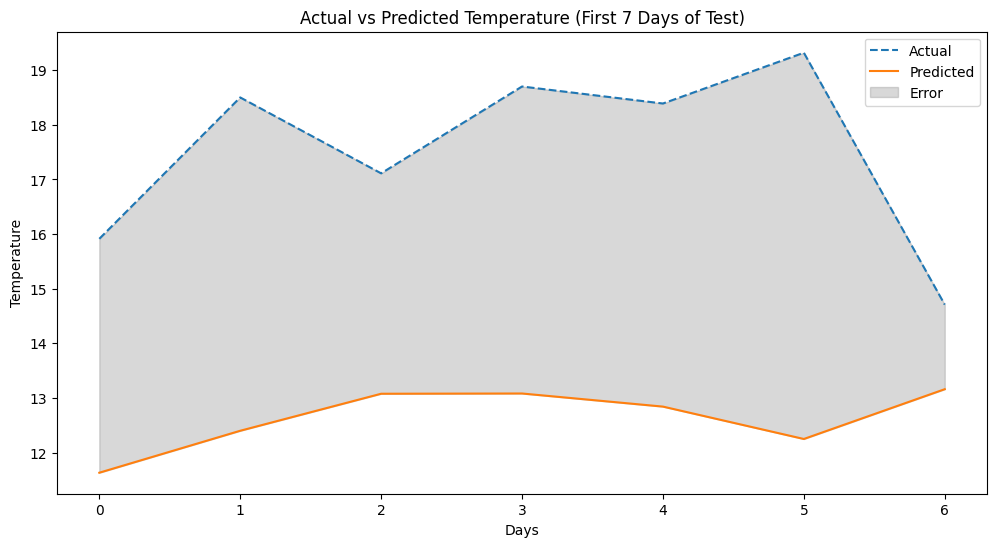

In [30]:
model.eval()
last_30_days = torch.tensor(train_values[-30:], dtype=torch.float32).unsqueeze(0)
with torch.no_grad():
    predictions = model(last_30_days).squeeze().numpy()

# 실제값 (온도만)
actuals = test_values[:7, 0]

# 예측값에서 온도만 선택
predictions_temp = predictions[:, 0]

# 차이 계산
error = actuals - predictions_temp

print(f"평균 에러: {error.mean()}")

# 시각화
plt.figure(figsize=(12, 6))
plt.plot(range(7), actuals, label='Actual', linestyle='dashed')
plt.plot(range(7), predictions_temp, label='Predicted')
plt.fill_between(range(7), actuals, predictions_temp, color='gray', alpha=0.3, label='Error')
plt.title('Actual vs Predicted Temperature (First 7 Days of Test)')
plt.xlabel('Days')
plt.ylabel('Temperature')
plt.legend()
plt.show()